In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [2]:
import pandas as pd
import csv
import os
import numpy as np
import nltk
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/THESIS/AISecKG-cybersecurity-dataset/Model/kg'

Mounted at /content/drive


In [4]:
triple = pd.read_csv(path + '/triples_gen.csv')

In [5]:
triple.head()

,Unnamed: 0,0,1,2
0,0,Attacks,can_harm,public domain
1,1,IDS,uses,Intrusion Detection
2,2,Snort,uses,Intrusion Detection
3,3,Snort,can_detect,network attacks
4,4,Snort,is_part_of,packet logger


In [6]:
len(triple)
triple.rename(columns={'Unnamed: 0': 'id', '0': 'e1', '1': 'r', '2': 'e2'}, inplace=True)

In [7]:
t1= triple.drop_duplicates(subset=['e1','r','e2'],keep='first')

t1.head()

,id,e1,r,e2
0,0,Attacks,can_harm,public domain
1,1,IDS,uses,Intrusion Detection
2,2,Snort,uses,Intrusion Detection
3,3,Snort,can_detect,network attacks
4,4,Snort,is_part_of,packet logger


In [8]:
len(t1)

735

In [9]:
t1.to_csv('clean_triples.csv')

In [10]:
# get a subset of triples to create a sub graphh on Nmap
# triple_kg = t1[48:68]
triple_kg = t1[1:100]

In [11]:
triple_kg.head()

,id,e1,r,e2
1,1,IDS,uses,Intrusion Detection
2,2,Snort,uses,Intrusion Detection
3,3,Snort,can_detect,network attacks
4,4,Snort,is_part_of,packet logger
5,5,Snort,can_analyze,traffic


In [12]:
len(triple_kg)

99

In [13]:
triple_kg.to_csv('temp.csv')

In [14]:
triple_kg = pd.read_csv(path + '/temp.csv')

In [15]:
# get the nodes and edges for KG
source = triple_kg['e1'].str.lower().tolist()
target = triple_kg['e2'].str.lower().tolist()
relations = triple_kg['r'].tolist()


 Knowledge Graph generated


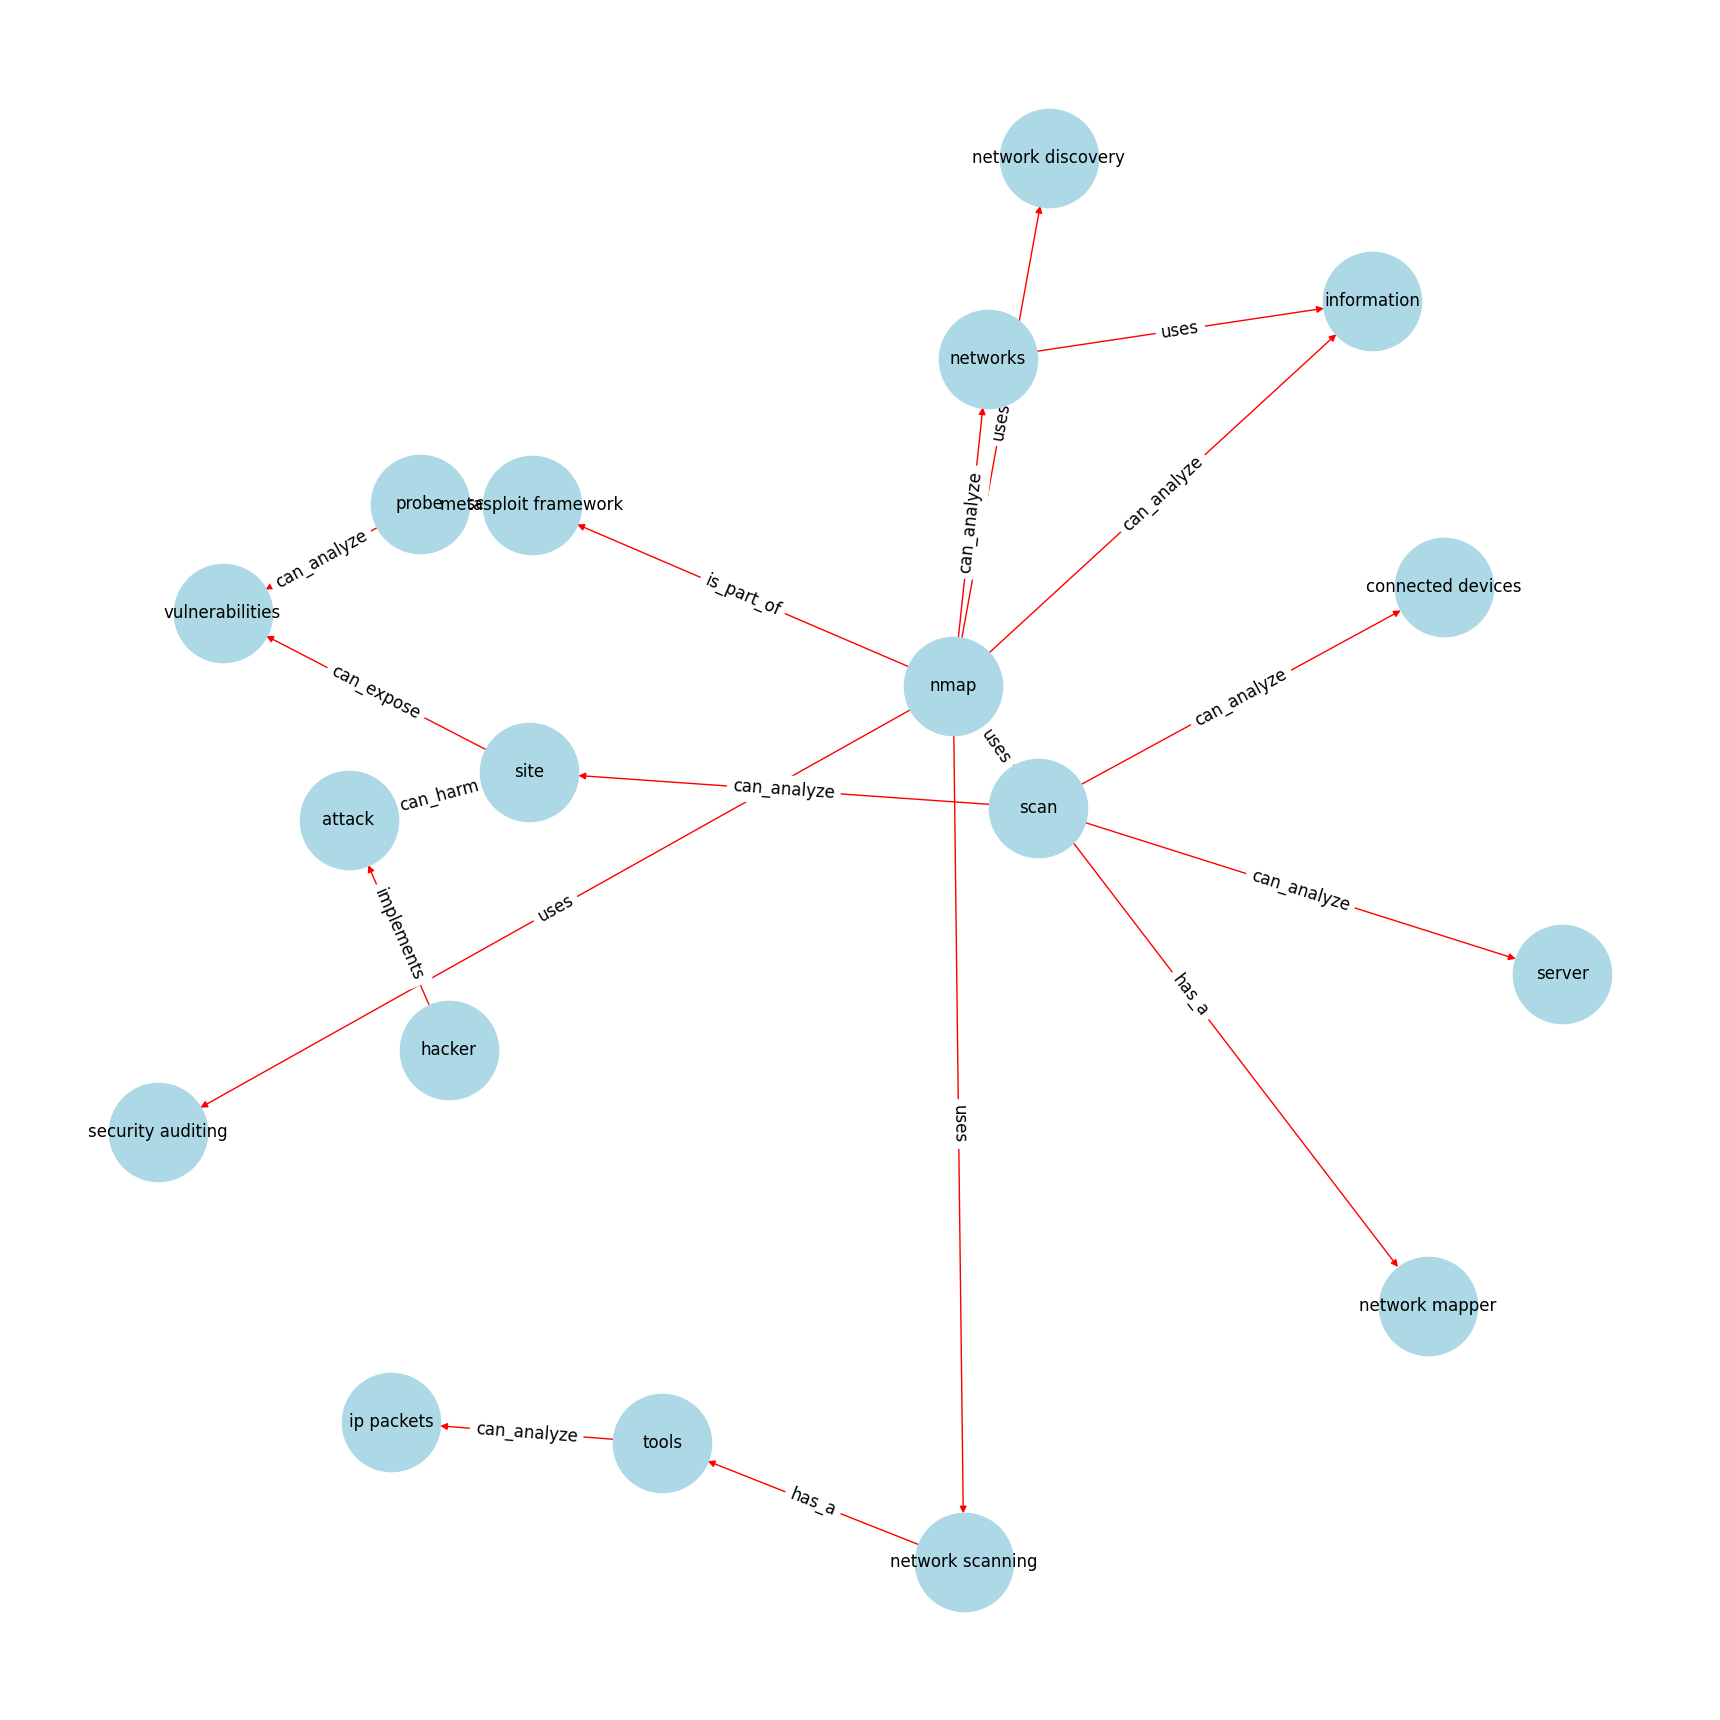

In [16]:
# generate the knowledge graph using networkx library
G = nx.DiGraph(directed=True)
for i in range(len(relations)):
    G.add_weighted_edges_from([(source[i], target[i], i)])
     #print(G.nodes)
#print(len(G.edges))
print("\n Knowledge Graph generated")
size = 17
# if (len(relations)/2)>20:
#     size= len(edge)/2
plt.figure(figsize=(size, size))
edge_labels= dict([((u,v), relations[d['weight']]) for u,v, d in G.edges(data=True)])
pos=nx.spring_layout(G,k=1.2)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.savefig('kg4.png')